<a href="https://colab.research.google.com/github/nagavarma9199/neural-networks/blob/main/ICP_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.optimizers.legacy import SGD
from tensorflow.keras.utils import to_categorical

In [3]:
seed = 7
np.random.seed(seed)

In [4]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# normalize inputs from 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

170498071/170498071 [==============================] - 6s 0us/step


In [10]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', kernel_constraint=MaxNorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=MaxNorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_constraint=MaxNorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [11]:
epochs = 25
lrate = 0.01
decay = lrate / epochs
sgd = SGD(learning_rate=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 512)               4194816   
                                                      

In [12]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1] * 100))

Epoch 1/25
1563/1563 [==============================] - 16s 6ms/step - loss: 1.7176 - accuracy: 0.3734 - val_loss: 1.4498 - val_accuracy: 0.4749
Epoch 2/25
1563/1563 [==============================] - 10s 6ms/step - loss: 1.3922 - accuracy: 0.4987 - val_loss: 1.2907 - val_accuracy: 0.5437
Epoch 3/25
1563/1563 [==============================] - 9s 6ms/step - loss: 1.2392 - accuracy: 0.5552 - val_loss: 1.1517 - val_accuracy: 0.5940
Epoch 4/25
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1264 - accuracy: 0.5970 - val_loss: 1.0965 - val_accuracy: 0.6135
Epoch 5/25
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0321 - accuracy: 0.6308 - val_loss: 1.0621 - val_accuracy: 0.6300
Epoch 6/25
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9517 - accuracy: 0.6625 - val_loss: 1.0115 - val_accuracy: 0.6405
Epoch 7/25
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8804 - accuracy: 0.6864 - val_loss: 0.9826 - val_accurac

In [5]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

In [6]:
model = Sequential()


model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), padding='same', activation='relu', kernel_constraint=MaxNorm(3)))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3, 3), padding='same', activation='relu', kernel_constraint=MaxNorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu', kernel_constraint=MaxNorm(3)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu', kernel_constraint=MaxNorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), padding='same', activation='relu', kernel_constraint=MaxNorm(3)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), padding='same', activation='relu', kernel_constraint=MaxNorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dropout(0.2))

model.add(Dense(1024, activation='relu', kernel_constraint=MaxNorm(3)))
model.add(Dropout(0.2))

model.add(Dense(512, activation='relu', kernel_constraint=MaxNorm(3)))
model.add(Dropout(0.2))

model.add(Dense(num_classes, activation='softmax'))

In [7]:
epochs = 25
lrate = 0.01
decay = lrate / epochs
sgd = SGD(learning_rate=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)        0         
                                                        

In [8]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1] * 100))

Accuracy: 79.86%


Predict the first 4 images of the test data using the above model. Then, compare with the actual label for those 4
images to check whether or not the model has predicted correctly.

In [9]:
import matplotlib.pyplot as plt

In [16]:
predictions = model.predict(X_test[:9])

predicted_classes = np.argmax(predictions, axis=1)

actual_classes = np.argmax(y_test[:9], axis=1)

1/1 [==============================] - 0s 307ms/step


In [21]:
def plot_images(images, labels, predictions):
    fig, axes = plt.subplots(1, 9, figsize=(12, 3))
    for i in range(9):
        axes[i].imshow(images[i])
        axes[i].set_title(f"Predicted: {predictions[i]}\nActual: {labels[i]}")
        axes[i].axis('off')
    plt.show()

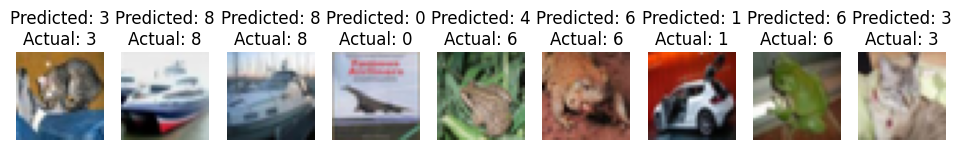

Image 1:
Predicted label: 3
Actual label: 3

Image 2:
Predicted label: 8
Actual label: 8

Image 3:
Predicted label: 8
Actual label: 8

Image 4:
Predicted label: 0
Actual label: 0

Image 5:
Predicted label: 4
Actual label: 6

Image 6:
Predicted label: 6
Actual label: 6

Image 7:
Predicted label: 1
Actual label: 1

Image 8:
Predicted label: 6
Actual label: 6

Image 9:
Predicted label: 3
Actual label: 3



In [22]:
plot_images(X_test[:9], actual_classes, predicted_classes)

# Print out the actual and predicted labels for comparison
for i in range(9):
    print(f"Image {i+1}:")
    print(f"Predicted label: {predicted_classes[i]}")
    print(f"Actual label: {actual_classes[i]}")
    print()

Visualize Loss and Accuracy using the history object

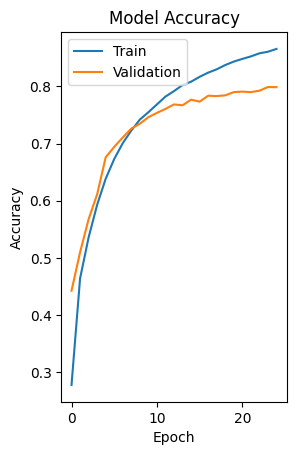

In [23]:
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

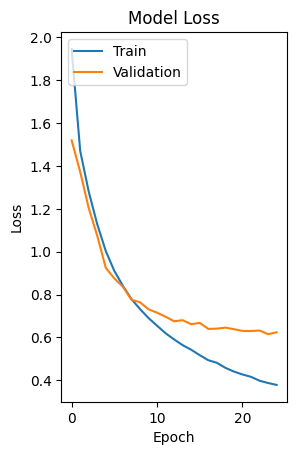

In [24]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')